In [3]:
import numpy as np
import numpy as np
import matplotlib.pyplot as plt

# KỊCH BẢN

## Tong quan chung

### Chi so do luong kinh te vi mo

- `us_cpi` (Chỉ số giá tiêu dùng): Thước đo lạm phát, cho thấy sự thay đổi giá cả của một giỏ hàng hóa và dịch vụ.
- `us_gdp` (Tổng sản phẩm quốc nội): Đo lường tổng giá trị thị trường của tất cả hàng hóa và dịch vụ được sản xuất trong một quốc gia, là chỉ số quan trọng nhất về tăng trưởng kinh tế.
- `us_unemployment` (Tỷ lệ thất nghiệp): Cho thấy sức khỏe của thị trường lao động.
- `us_debt` (Nợ công): Phản ánh tình hình tài chính và ngân sách của chính phủ.

### 1.2. Chỉ số mô phỏng mức độ rủi ro của Credit Suisse

#### 1.2.1. `NLP_sentiment_score`

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def generate_nlp_scores(
    start_date: str,
    num_days: int,
    prob_news_event: float,
    mean_score: float,
    std_dev_score: float,
    output_filename: str
):
    """
    Hàm này sinh ra dữ liệu điểm NLP (đã có từ trước, giữ nguyên).
    """
    dates = pd.date_range(start=start_date, periods=num_days, freq='D')
    data = []
    for date in dates:
        score = 0
        if np.random.rand() < prob_news_event:
            score = np.random.normal(loc=mean_score, scale=std_dev_score)
        data.append({'date': date, 'nlp_score': score})
    df = pd.DataFrame(data)
    df['nlp_score'] = df['nlp_score'].round().astype(int)
    # Lưu ý: Không định dạng lại cột date thành string để tiện cho việc vẽ biểu đồ
    # df['date'] = df['date'].dt.strftime('%Y-%m-%d')
    df.to_csv(output_filename, index=False, date_format='%Y-%m-%d')
    return df

In [9]:
def visualize_scores(df: pd.DataFrame, scenario_params: dict):
    """
    Hàm mới: Trực quan hóa dữ liệu điểm NLP, sử dụng Bar Chart và Histogram.
    """
    print("\nĐang tạo biểu đồ trực quan hóa...")
    
    # Thiết lập giao diện cho biểu đồ
    sns.set_theme(style="whitegrid")
    
    # Tạo một figure chứa 2 biểu đồ con (2 hàng, 1 cột)
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10), sharex=False, gridspec_kw={'height_ratios': [2, 1]})
    
    # --- Biểu đồ 1: Biểu đồ CỘT theo thời gian (ĐÃ THAY ĐỔI) ---
    
    # Tạo danh sách màu: xanh cho giá trị >= 0, đỏ cho giá trị < 0
    colors = ['g' if x >= 0 else 'r' for x in df['nlp_score']]
    
    # Vẽ biểu đồ cột
    ax1.bar(df['date'], df['nlp_score'], color=colors, alpha=0.8, width=1.0) # width=1.0 để các cột sát nhau hơn
    
    ax1.axhline(0, color='black', linestyle='-', linewidth=0.8) # Giữ đường zero-line
    ax1.set_title('Điểm Sentiment NLP Theo Thời Gian (Dạng Cột)', fontsize=16)
    ax1.set_ylabel('Điểm Sentiment')
    
    # --- Biểu đồ 2: Biểu đồ phân phối (Histogram) ---
    # (Giữ nguyên không thay đổi)
    sns.histplot(df['nlp_score'], kde=True, ax=ax2, color='skyblue')
    mean_score_param = scenario_params.get("mean_score", 0)
    ax2.axvline(mean_score_param, color='darkorange', linestyle='--', linewidth=2, label=f'Mean Kịch bản ({mean_score_param})')
    ax2.set_title('Phân Phối của Điểm Sentiment', fontsize=14)
    ax2.set_xlabel('Điểm Sentiment')
    ax2.set_ylabel('Tần suất')
    ax2.legend()
    
    # Tự động điều chỉnh layout và hiển thị biểu đồ
    plt.tight_layout()
    plt.show()

Đang chạy kịch bản với các tham số: {'prob_news_event': 0.4, 'mean_score': 1, 'std_dev_score': 5.0}

Xem trước 10 dòng dữ liệu đầu tiên (dạng số nguyên):
        date  nlp_score
0 2022-01-01          0
1 2022-01-02          0
2 2022-01-03          0
3 2022-01-04          0
4 2022-01-05          1
5 2022-01-06          4
6 2022-01-07          5
7 2022-01-08         -2
8 2022-01-09          0
9 2022-01-10          0

Đang tạo biểu đồ trực quan hóa...


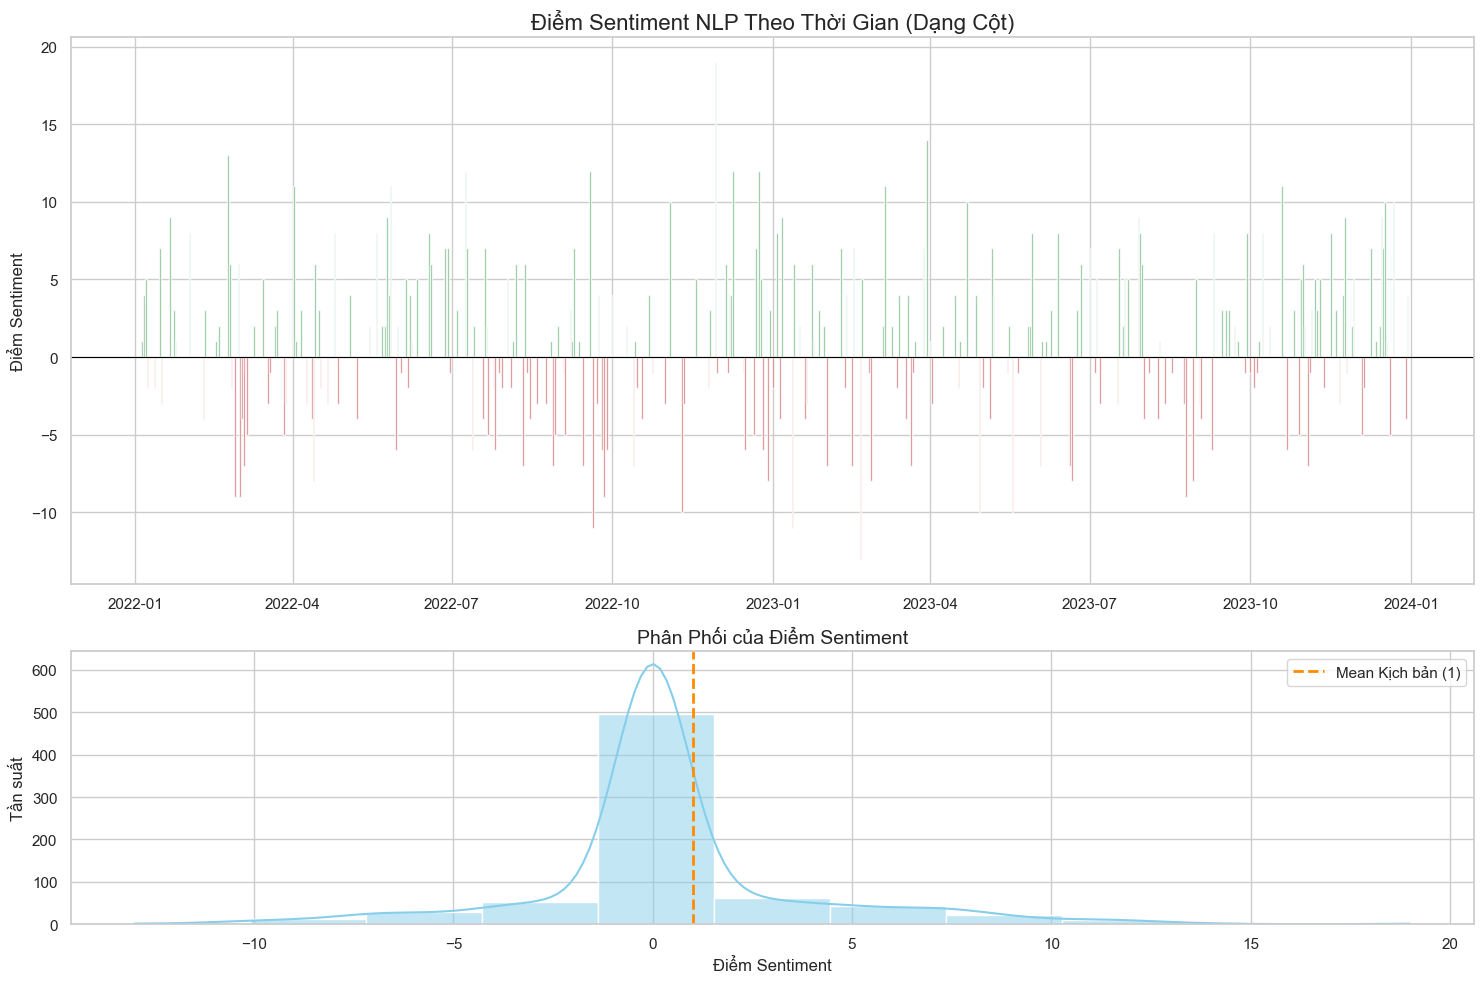

In [12]:
def NLP_sentiment_score():
    # =================================================================
    # == ĐÂY LÀ NƠI BẠN TÙY CHỈNH CÁC KỊCH BẢN VÀ THAM SỐ      ==
    # =================================================================
    
    # --- Input chung ---
    START_DATE = '2022-01-01'
    NUM_DAYS = 365 * 2  # Sinh dữ liệu cho 2 năm
    OUTPUT_FILENAME = 'nlp_sentiment_scores_integer.csv'

    # --- Định nghĩa các kịch bản ---
    
    # Kịch bản 1: Giai đoạn khủng hoảng, tin tức tiêu cực và dồn dập
    scenario_crisis = {
        "prob_news_event": 0.40,  # 40% khả năng có tin tức, xảy ra thường xuyên hơn
        "mean_score": 1,       # Tin tức có xu hướng tiêu cực mạnh (trung bình là -3)
        "std_dev_score": 5.0      # Biến động rất cao, nhiều tin xấu cực đoan
    }
    
    # --- CHỌN KỊCH BẢN BẠN MUỐN CHẠY ---
    selected_scenario = scenario_crisis
    
    print(f"Đang chạy kịch bản với các tham số: {selected_scenario}")
    
    # Gọi hàm để sinh dữ liệu
    generated_df = generate_nlp_scores(
        start_date=START_DATE,
        num_days=NUM_DAYS,
        output_filename=OUTPUT_FILENAME,
        **selected_scenario
    )
    
    # In ra 10 dòng đầu tiên của dữ liệu đã tạo
    print("\nXem trước 10 dòng dữ liệu đầu tiên (dạng số nguyên):")
    print(generated_df.head(10))
    
    # ================================================================
    # == GỌI HÀM VISUALIZE MỚI                                     ==
    # ================================================================
    visualize_scores(generated_df, selected_scenario)

# Chạy hàm chính
NLP_sentiment_score()

#### 1.2.1. `cds_cs_5y` - Hợp đồng hoán đổi rủi ro tín dụng 5 năm của Credit Suisse (5-year Credit Default Swap).

Vì `CDS_CS` là chỉ số đánh giá mức độ rủi ro, tác động trực tiếp bởi niềm tin nên ta sẽ tạo dataset sau từ chỉ số niềm tin.
$$CDS_{t} = \omega + \phi \cdot CDS_{t-1} - \beta \cdot S_{t} + \alpha_{CSD}\epsilon_{t}$$
Với $\epsilon \sim N(0, 1) $ 

In [13]:
def generate_cds_data(
    nlp_scores_df: pd.DataFrame,
    omega: float,
    phi: float,
    beta: float,
    sigma: float,
    start_cds_value: float
) -> pd.DataFrame:
    """
    Sinh dữ liệu CDS dựa trên điểm NLP và các tham số của mô hình.

    Args:
        nlp_scores_df (pd.DataFrame): DataFrame chứa cột 'date' và 'nlp_score'.
        omega (float): Mức rủi ro cơ sở (intercept).
        phi (float): Hệ số tự hồi quy (quán tính của thị trường).
        beta (float): Hệ số tác động của điểm NLP.
        sigma (float): Độ lệch chuẩn của nhiễu ngẫu nhiên (epsilon).
        start_cds_value (float): Giá trị CDS ban đầu.

    Returns:
        pd.DataFrame: DataFrame chứa ngày, điểm NLP và giá trị CDS tương ứng.
    """
    print("Bắt đầu sinh dữ liệu CDS...")
    
    # Lấy danh sách điểm NLP từ DataFrame input
    nlp_scores = nlp_scores_df['nlp_score'].values
    num_days = len(nlp_scores)
    
    # Khởi tạo một mảng để lưu kết quả CDS
    cds_series = np.zeros(num_days)
    cds_series[0] = start_cds_value # Gán giá trị CDS cho ngày đầu tiên
    
    # Bắt đầu vòng lặp từ ngày thứ hai (index 1)
    for t in range(1, num_days):
        # Lấy các giá trị cần thiết từ các bước trước
        cds_yesterday = cds_series[t-1]
        nlp_today = nlp_scores[t]
        
        # Tạo nhiễu ngẫu nhiên epsilon cho ngày hôm nay
        random_shock = np.random.normal(0, sigma)
        
        # Áp dụng công thức mô hình
        cds_today = omega + (phi * cds_yesterday) - (beta * nlp_today) + random_shock
        
        # Một ràng buộc thực tế: Rủi ro (CDS) không thể là số âm.
        # Nếu tính ra âm, ta sẽ đặt nó ở một mức sàn tối thiểu (ví dụ: 1).
        cds_series[t] = max(1, cds_today)
        
    # Tạo DataFrame kết quả
    result_df = nlp_scores_df.copy()
    result_df['cds_spread'] = cds_series.round(2) # Làm tròn cho đẹp
    
    print("Hoàn tất sinh dữ liệu CDS.")
    return result_df

In [ ]:
def generate_nlp_scores(start_date: str, num_days: int, prob_news_event: float, mean_score: float, std_dev_score: float):
    dates = pd.date_range(start=start_date, periods=num_days, freq='D')
    data = []
    for date in dates:
        score = 0
        if np.random.rand() < prob_news_event:
            score = np.random.normal(loc=mean_score, scale=std_dev_score)
        data.append({'date': date, 'nlp_score': score})
    df = pd.DataFrame(data)
    df['nlp_score'] = df['nlp_score'].round().astype(int)
    return df

# --- Hàm 2: Sinh dữ liệu CDS (Giữ nguyên) ---
def generate_cds_data(nlp_scores_df: pd.DataFrame, omega: float, phi: float, beta: float, sigma: float, start_cds_value: float):
    nlp_scores = nlp_scores_df['nlp_score'].values
    num_days = len(nlp_scores)
    cds_series = np.zeros(num_days)
    cds_series[0] = start_cds_value
    for t in range(1, num_days):
        cds_yesterday = cds_series[t-1]
        nlp_today = nlp_scores[t]
        random_shock = np.random.normal(0, sigma)
        cds_today = omega + (phi * cds_yesterday) - (beta * nlp_today) + random_shock
        cds_series[t] = max(1, cds_today)
    result_df = nlp_scores_df.copy()
    result_df['cds_spread'] = cds_series.round(2)
    return result_df

# --- Hàm 3: Trực quan hóa (Giữ nguyên) ---
def visualize_combined_data(df: pd.DataFrame):
    print("\nĐang tạo biểu đồ kết quả...")
    sns.set_theme(style="whitegrid")
    df['date'] = pd.to_datetime(df['date'])
    fig, ax1 = plt.subplots(figsize=(15, 7))
    colors = ['g' if x >= 0 else 'r' for x in df['nlp_score']]
    ax1.bar(df['date'], df['nlp_score'], color=colors, alpha=0.5, width=1.0, label='Điểm NLP (Trục trái)')
    ax1.set_xlabel('Ngày')
    ax1.set_ylabel('Điểm Sentiment NLP', color='dimgray')
    ax1.tick_params(axis='y', labelcolor='dimgray')
    ax2 = ax1.twinx()
    ax2.plot(df['date'], df['cds_spread'], color='royalblue', linewidth=2.5, label='CDS Spread (Trục phải)')
    ax2.set_ylabel('CDS Spread (Basis Points)', color='royalblue')
    ax2.tick_params(axis='y', labelcolor='royalblue')
    plt.title('Mô Phỏng Rủi Ro Tín Dụng (CDS) Dựa Trên Sentiment Thị Trường', fontsize=16)
    fig.tight_layout()
    plt.show()

Bắt đầu sinh dữ liệu CDS...
Hoàn tất sinh dữ liệu CDS.
Thành công! Đã lưu dataset cuối cùng vào 'final_cds_dataset.csv'

Xem trước 5 dòng dữ liệu cuối cùng:
           date  nlp_score  cds_spread
725  2023-12-27          0       76.80
726  2023-12-28          0       86.05
727  2023-12-29         -4      100.00
728  2023-12-30          4       96.73
729  2023-12-31          0      104.25
Đang tạo biểu đồ kết hợp...


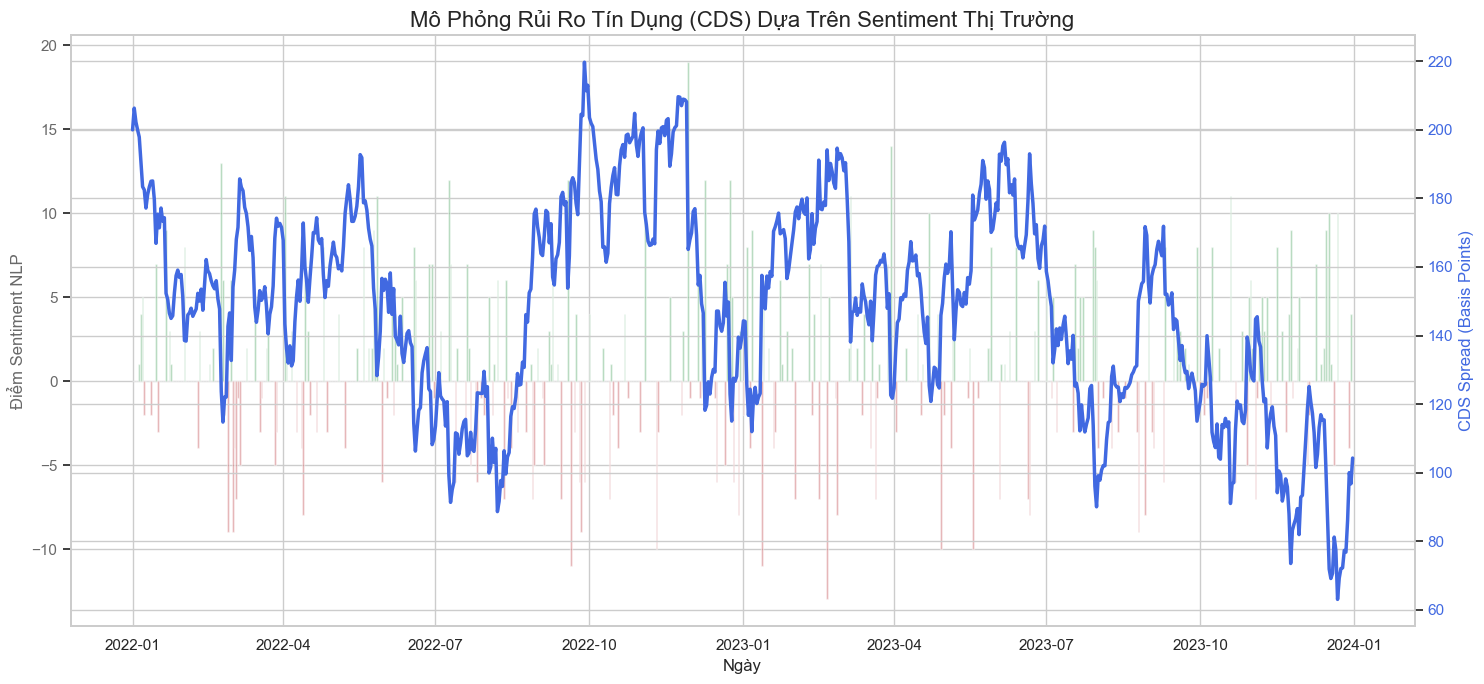

In [16]:
def example_CDS():
    
    # --- Input: Tên file NLP đã tạo ở bước trước ---
    NLP_DATA_FILENAME = 'nlp_sentiment_scores_integer.csv'
    OUTPUT_FILENAME = 'final_cds_dataset.csv'
    
    # --- Tùy chỉnh các tham số cho mô hình CDS của bạn ---
    model_params = {
        "omega": 5,      # Mức rủi ro cơ sở là 5 điểm
        "phi": 0.97,     # Quán tính rất cao, giá hôm nay 97% "nhớ" giá hôm qua
        "beta": 2.0,     # Mỗi 1 điểm NLP sẽ tác động 2.0 điểm vào CDS
        "sigma": 4.0,    # Mức độ nhiễu ngẫu nhiên của thị trường
        "start_cds_value": 200 # Giả định CDS bắt đầu ở mức 200 điểm
    }
    
    # Đọc file dữ liệu NLP
    try:
        nlp_df = pd.read_csv(NLP_DATA_FILENAME)
    except FileNotFoundError:
        print(f"Lỗi: Không tìm thấy file '{NLP_DATA_FILENAME}'.")
        print("Vui lòng chạy script sinh điểm NLP trước để tạo ra file này.")
        exit()

    # Gọi hàm để sinh ra dữ liệu CDS
    final_dataset = generate_cds_data(nlp_df, **model_params)
    
    # Lưu dataset cuối cùng ra file CSV
    final_dataset.to_csv(OUTPUT_FILENAME, index=False)
    print(f"Thành công! Đã lưu dataset cuối cùng vào '{OUTPUT_FILENAME}'")
    
    # In ra 5 dòng cuối cùng để kiểm tra
    print("\nXem trước 5 dòng dữ liệu cuối cùng:")
    print(final_dataset.tail())
    
    # Trực quan hóa kết quả
    visualize_combined_data(final_dataset)

example_CDS()

## Kịch bản 01: Thị trường vĩ mô và Credit Suisse bình thường

## Kịch bản 02: Thị trường vĩ mô bình thường và Credit Suisse gặp rủi ro

## Kịch bản 03: Thị trường vĩ mô và Credit Suisse đều gặp khủng hoảng